# **Restaurant Risk Prediction**

# Import

In [349]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load

In [350]:
df = pd.read_csv('restaurant_cleaned.csv')

In [351]:
df.head()

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_type,risk_category,neighborhoods,inspection_year,inspection_month,inspection_day
0,3649,94103,37.765708,-122.409002,82,103131,1,2,53,2017,12,6
1,2929,94109,37.790523,-122.413158,98,103142,1,1,50,2018,6,4
2,3025,94122,37.754086,-122.478350,88,103149,1,1,39,2018,3,14
3,2334,94110,37.755693,-122.406650,88,103116,2,2,53,2017,11,28
4,37350,94103,37.785386,-122.403723,94,103149,1,1,32,2019,4,12


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20299 entries, 0 to 20298
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_id           20299 non-null  int64  
 1   business_postal_code  20299 non-null  int64  
 2   business_latitude     20299 non-null  float64
 3   business_longitude    20299 non-null  float64
 4   inspection_score      20299 non-null  int64  
 5   violation_id          20299 non-null  int64  
 6   violation_type        20299 non-null  int64  
 7   risk_category         20299 non-null  int64  
 8   neighborhoods         20299 non-null  int64  
 9   inspection_year       20299 non-null  int64  
 10  inspection_month      20299 non-null  int64  
 11  inspection_day        20299 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.9 MB


# Scaling Data

In [353]:
X = df.drop('risk_category', axis=1)
y = df['risk_category']

In [354]:
target_names = ['Low Risk', 'Medium Risk', 'High Risk']

Apply Standard Scaler

In [355]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['business_latitude', 'business_longitude', 'inspection_score', 'neighborhoods']] = scaler.fit_transform(df[['business_latitude', 'business_longitude', 'inspection_score', 'neighborhoods']])

In [356]:
df

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_type,risk_category,neighborhoods,inspection_year,inspection_month,inspection_day
0,3649,94103,-0.262262,0.644297,-0.412927,103131,1,2,-0.121124,2017,12,6
1,2929,94109,0.797334,0.494548,1.560180,103142,1,1,-0.206830,2018,6,4
2,3025,94122,-0.758520,-1.854439,0.326988,103149,1,1,-0.521087,2018,3,14
3,2334,94110,-0.689901,0.729044,0.326988,103116,2,2,-0.121124,2017,11,28
4,37350,94103,0.577985,0.834509,1.066904,103149,1,1,-0.721068,2019,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
20294,68998,94118,0.467564,-1.311223,1.066904,103145,2,1,-1.492426,2018,10,26
20295,66584,94112,-2.340293,-0.491499,0.573627,103120,2,2,0.935922,2018,4,30
20296,67182,94103,-0.184676,0.581781,1.313542,103143,3,1,-0.121124,2017,7,31
20297,70090,94103,-0.073614,0.415855,0.943584,103105,2,3,-0.721068,2017,1,5


# Training Testing Split

In [357]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

In [358]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16239, 11), (4060, 11), (16239,), (4060,))

In [359]:
X_train

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_type,neighborhoods,inspection_year,inspection_month,inspection_day
18492,65382,94122,37.763983,-122.467090,78,103105,2,109,2019,9,3
6592,4700,94115,37.785093,-122.441498,92,103120,2,103,2017,3,9
4564,3151,94133,37.796808,-122.407964,76,103133,1,104,2017,11,30
4094,36020,94109,37.783464,-122.415829,88,103119,3,20,2018,5,1
6488,2758,94115,37.788183,-122.446757,90,103131,1,10,2019,5,8
...,...,...,...,...,...,...,...,...,...,...,...
9372,18514,94110,37.762366,-122.419491,83,103105,2,53,2019,7,16
7291,1135,94115,37.782778,-122.444744,96,103124,1,103,2017,11,2
17728,69909,94110,37.746459,-122.419400,94,103142,1,83,2018,3,9
7293,61494,94124,37.731902,-122.391576,61,103120,2,86,2018,7,18


In [360]:
X_test

,business_id,business_postal_code,business_latitude,business_longitude,inspection_score,violation_id,violation_type,neighborhoods,inspection_year,inspection_month,inspection_day
10674,4794,94107,37.778634,-122.393089,71,103114,1,32,2018,10,30
3367,816,94124,37.722374,-122.395841,85,103105,2,88,2017,1,17
15907,7759,94112,37.723086,-122.435983,89,103161,1,90,2017,3,21
1503,4762,94133,37.808616,-122.415779,98,103161,1,99,2019,5,8
8537,61494,94124,37.731902,-122.391576,61,103132,2,86,2019,2,7
...,...,...,...,...,...,...,...,...,...,...,...
5606,64466,94121,37.775813,-122.494499,86,103145,2,8,2018,2,8
19737,70960,94102,37.777273,-122.423084,86,103154,1,22,2019,3,21
1716,1617,94118,37.782843,-122.465900,71,103142,1,5,2018,5,22
6197,3935,94109,37.788108,-122.412394,96,103120,2,50,2019,6,3


# Modeling

In [361]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def displayMetrics(name, y_true, y_pred):
  print('Accuracy', name,': ', accuracy_score(y_true, y_pred))
  print('Precision Score', name,': ', precision_score(y_true, y_pred, average=None)) 
  print('Recall', name,': ', recall_score(y_true, y_pred, average=None))
  print('F1 Score', name,': ', f1_score(y_true, y_pred, average=None))

In [362]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(name, y_true, y_pred):
  conf_matrix = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
  
  plt.xlabel('Predictions')
  plt.ylabel('Actuals')
  plt.title('Confusion Matrix {}'.format(name))
  plt.show()

## Linear Model

### Logistic Regression (Base)

In [363]:
from sklearn.linear_model import LogisticRegression

logis = LogisticRegression(max_iter=1000)
logis.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Training Data Report

In [364]:
y_pred_train_logis = logis.predict(X_train)
displayMetrics("(Base Training)", y_train, y_pred_train_logis)

Accuracy (Base Training) :  0.7399470410739577
Precision Score (Base Training) :  [0.82945736 0.63913576 0.69609079]
Recall (Base Training) :  [0.84579674 0.69147878 0.4935181 ]
F1 Score (Base Training) :  [0.83754737 0.66427775 0.57755689]


In [365]:
print(classification_report(y_train, y_pred_train_logis, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.83      0.85      0.84      7970
 Medium Risk       0.64      0.69      0.66      6032
   High Risk       0.70      0.49      0.58      2237

    accuracy                           0.74     16239
   macro avg       0.72      0.68      0.69     16239
weighted avg       0.74      0.74      0.74     16239



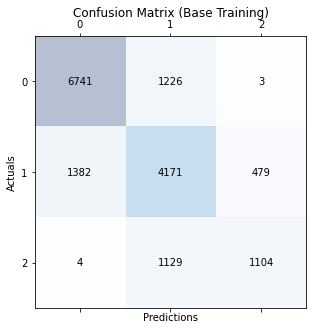

In [366]:
plot_confusion_matrix("(Base Training)", y_train, y_pred_train_logis)

Testing Data Report

In [367]:
y_pred_test_logis = logis.predict(X_test)
displayMetrics("(Base Testing)", y_test, y_pred_test_logis)

Accuracy (Base Testing) :  0.734975369458128
Precision Score (Base Testing) :  [0.81157194 0.65002936 0.72277228]
Recall (Base Testing) :  [0.84353379 0.69798235 0.4907563 ]
F1 Score (Base Testing) :  [0.82724426 0.67315293 0.58458458]


In [368]:
print(classification_report(y_test, y_pred_test_logis, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.81      0.84      0.83      1879
 Medium Risk       0.65      0.70      0.67      1586
   High Risk       0.72      0.49      0.58       595

    accuracy                           0.73      4060
   macro avg       0.73      0.68      0.69      4060
weighted avg       0.74      0.73      0.73      4060



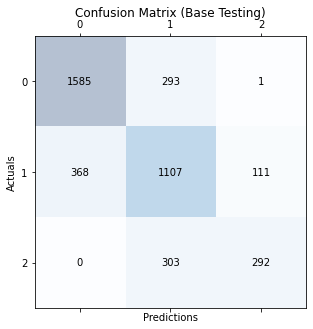

In [369]:
plot_confusion_matrix("(Base Testing)", y_test, y_pred_test_logis)

### Logistic Regression (Newton-Saga Solver)

In [370]:
logis_nw = LogisticRegression(solver='newton-cg', max_iter=1000)
logis_nw.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=1000, solver='newton-cg')

Training Data Report

In [371]:
y_pred_train_logis_nw = logis_nw.predict(X_train)
displayMetrics("(Newton Training)", y_train, y_pred_train_logis_nw)

Accuracy (Newton Training) :  0.7948149516595849
Precision Score (Newton Training) :  [0.87370652 0.7063129  0.76325301]
Recall (Newton Training) :  [0.87929737 0.76790451 0.56638355]
F1 Score (Newton Training) :  [0.87649303 0.73582208 0.65024378]


In [372]:
print(classification_report(y_train, y_pred_train_logis_nw, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.87      0.88      0.88      7970
 Medium Risk       0.71      0.77      0.74      6032
   High Risk       0.76      0.57      0.65      2237

    accuracy                           0.79     16239
   macro avg       0.78      0.74      0.75     16239
weighted avg       0.80      0.79      0.79     16239



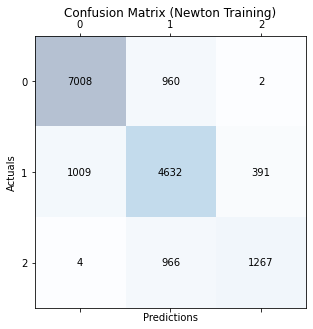

In [373]:
plot_confusion_matrix("(Newton Training)", y_train, y_pred_train_logis_nw)

Testing Data Report

In [374]:
y_pred_test_logis_nw = logis_nw.predict(X_test)
displayMetrics("(Newton Testing)", y_test, y_pred_test_logis_nw)

Accuracy (Newton Testing) :  0.7891625615763547
Precision Score (Newton Testing) :  [0.85841636 0.71098266 0.79669031]
Recall (Newton Testing) :  [0.87120809 0.77553594 0.56638655]
F1 Score (Newton Testing) :  [0.86476492 0.74185766 0.66208251]


In [375]:
print(classification_report(y_test, y_pred_test_logis_nw, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.86      0.87      0.86      1879
 Medium Risk       0.71      0.78      0.74      1586
   High Risk       0.80      0.57      0.66       595

    accuracy                           0.79      4060
   macro avg       0.79      0.74      0.76      4060
weighted avg       0.79      0.79      0.79      4060



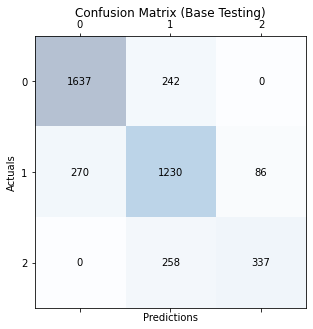

In [376]:
plot_confusion_matrix("(Base Testing)", y_test, y_pred_test_logis_nw)

## Geometric Model

### KNN (Eucledian Metric)

In [377]:
from sklearn.neighbors import KNeighborsClassifier

neigh_euc = KNeighborsClassifier(n_neighbors=8, p=2)
neigh_euc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Training Data Report

In [378]:
y_pred_train_neigh_euc = neigh_euc.predict(X_train)
displayMetrics("(KNN Eucledian Training)", y_train, y_pred_train_neigh_euc)

Accuracy (KNN Eucledian Training) :  0.8268982080177351
Precision Score (KNN Eucledian Training) :  [0.86252523 0.7628125  0.92725299]
Recall (KNN Eucledian Training) :  [0.9651192  0.80935013 0.38176129]
F1 Score (KNN Eucledian Training) :  [0.91094268 0.78539254 0.54084864]


In [379]:
print(classification_report(y_train, y_pred_train_neigh_euc, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.86      0.97      0.91      7970
 Medium Risk       0.76      0.81      0.79      6032
   High Risk       0.93      0.38      0.54      2237

    accuracy                           0.83     16239
   macro avg       0.85      0.72      0.75     16239
weighted avg       0.83      0.83      0.81     16239



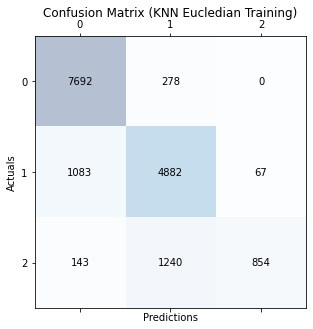

In [380]:
plot_confusion_matrix("(KNN Eucledian Training)", y_train, y_pred_train_neigh_euc)

Testing Data Report

In [381]:
y_pred_test_neigh_euc = neigh_euc.predict(X_test)
displayMetrics("(KNN Eucledian Testing)", y_test, y_pred_test_neigh_euc)

Accuracy (KNN Eucledian Testing) :  0.74064039408867
Precision Score (KNN Eucledian Testing) :  [0.78388113 0.67924528 0.76530612]
Recall (KNN Eucledian Testing) :  [0.92655668 0.703657   0.25210084]
F1 Score (KNN Eucledian Testing) :  [0.84926829 0.69123568 0.37926675]


In [382]:
print(classification_report(y_test, y_pred_test_neigh_euc, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.78      0.93      0.85      1879
 Medium Risk       0.68      0.70      0.69      1586
   High Risk       0.77      0.25      0.38       595

    accuracy                           0.74      4060
   macro avg       0.74      0.63      0.64      4060
weighted avg       0.74      0.74      0.72      4060



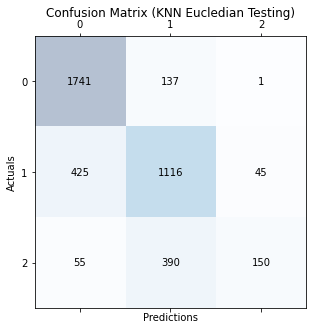

In [383]:
plot_confusion_matrix("(KNN Eucledian Testing)", y_test, y_pred_test_neigh_euc)

### KNN (Manhatten Metric)

In [384]:
neigh_man = KNeighborsClassifier(n_neighbors=8, p=2)
neigh_man.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Training Data Report

In [385]:
y_pred_train_neigh_man = neigh_man.predict(X_train)
displayMetrics("(KNN Manhatten Training)", y_train, y_pred_train_neigh_man)

Accuracy (KNN Manhatten Training) :  0.8268982080177351
Precision Score (KNN Manhatten Training) :  [0.86252523 0.7628125  0.92725299]
Recall (KNN Manhatten Training) :  [0.9651192  0.80935013 0.38176129]
F1 Score (KNN Manhatten Training) :  [0.91094268 0.78539254 0.54084864]


In [386]:
print(classification_report(y_train, y_pred_train_neigh_man, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.86      0.97      0.91      7970
 Medium Risk       0.76      0.81      0.79      6032
   High Risk       0.93      0.38      0.54      2237

    accuracy                           0.83     16239
   macro avg       0.85      0.72      0.75     16239
weighted avg       0.83      0.83      0.81     16239



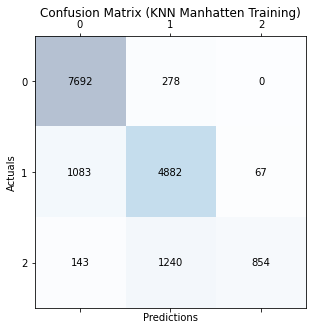

In [387]:
plot_confusion_matrix("(KNN Manhatten Training)", y_train, y_pred_train_neigh_man)

Testing Data Report

In [388]:
y_pred_test_neigh_man = neigh_man.predict(X_test)
displayMetrics("(KNN Manhatten Testing)", y_test, y_pred_test_neigh_man)

Accuracy (KNN Manhatten Testing) :  0.74064039408867
Precision Score (KNN Manhatten Testing) :  [0.78388113 0.67924528 0.76530612]
Recall (KNN Manhatten Testing) :  [0.92655668 0.703657   0.25210084]
F1 Score (KNN Manhatten Testing) :  [0.84926829 0.69123568 0.37926675]


In [389]:
print(classification_report(y_test, y_pred_test_neigh_man, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       0.78      0.93      0.85      1879
 Medium Risk       0.68      0.70      0.69      1586
   High Risk       0.77      0.25      0.38       595

    accuracy                           0.74      4060
   macro avg       0.74      0.63      0.64      4060
weighted avg       0.74      0.74      0.72      4060



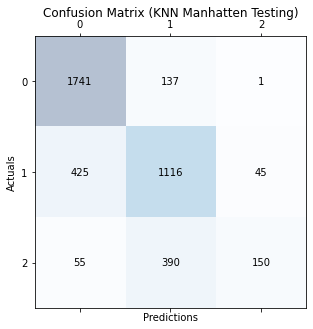

In [390]:
plot_confusion_matrix("(KNN Manhatten Testing)", y_test, y_pred_test_neigh_man)

## Probabilistic Model

### Gaussian Naïve Bayes

In [391]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

GaussianNB()

Training Data Report

In [392]:
y_pred_train_gauss_nb = gauss_nb.predict(X_train)
displayMetrics("(GaussianNB Training)", y_train, y_pred_train_gauss_nb)

Accuracy (GaussianNB Training) :  0.9818954369111399
Precision Score (GaussianNB Training) :  [0.99949648 0.9560108  0.99349349]
Recall (GaussianNB Training) :  [0.99623588 0.99801061 0.88734913]
F1 Score (GaussianNB Training) :  [0.99786352 0.97655933 0.93742621]


In [393]:
print(classification_report(y_train, y_pred_train_gauss_nb, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00      7970
 Medium Risk       0.96      1.00      0.98      6032
   High Risk       0.99      0.89      0.94      2237

    accuracy                           0.98     16239
   macro avg       0.98      0.96      0.97     16239
weighted avg       0.98      0.98      0.98     16239



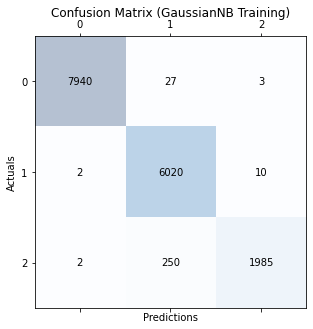

In [394]:
plot_confusion_matrix("(GaussianNB Training)", y_train, y_pred_train_gauss_nb)

Testing Data Report

In [395]:
y_pred_test_gauss_nb = gauss_nb.predict(X_test)
displayMetrics("(GaussianNB Testing)", y_test, y_pred_test_gauss_nb)

Accuracy (GaussianNB Testing) :  0.9795566502463054
Precision Score (GaussianNB Testing) :  [0.99946581 0.95246691 0.99429658]
Recall (GaussianNB Testing) :  [0.99574242 0.99810845 0.8789916 ]
F1 Score (GaussianNB Testing) :  [0.99760064 0.97475369 0.93309545]


In [396]:
print(classification_report(y_test, y_pred_test_gauss_nb, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00      1879
 Medium Risk       0.95      1.00      0.97      1586
   High Risk       0.99      0.88      0.93       595

    accuracy                           0.98      4060
   macro avg       0.98      0.96      0.97      4060
weighted avg       0.98      0.98      0.98      4060



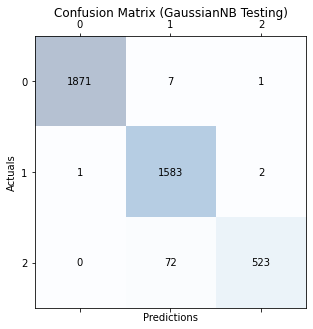

In [397]:
plot_confusion_matrix("(GaussianNB Testing)", y_test, y_pred_test_gauss_nb)

## Logical Model

### Decision Tree

In [398]:
from sklearn.tree import DecisionTreeClassifier

dstree = DecisionTreeClassifier()
dstree.fit(X_train, y_train)

DecisionTreeClassifier()

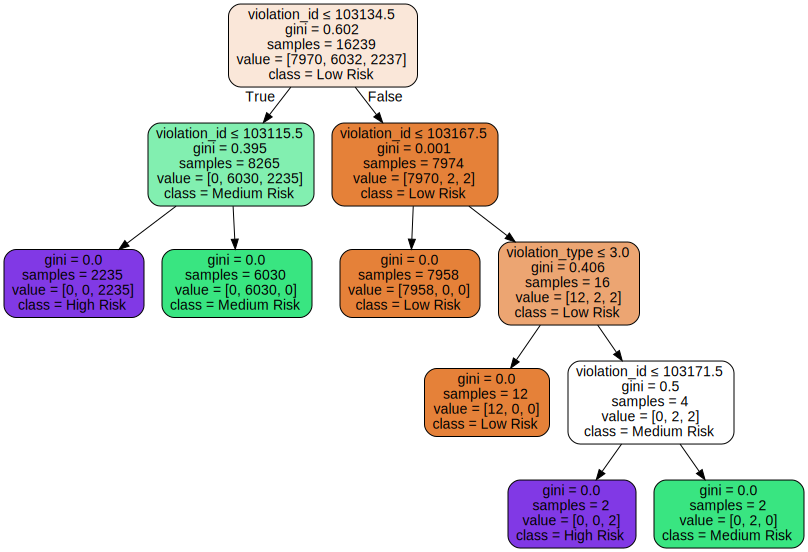

In [399]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dstree, out_file=None, feature_names=X_train.columns, class_names=target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

Training Data Report

In [400]:
y_pred_train_dstree = dstree.predict(X_train)
displayMetrics("(DecisionTree Training)", y_train, y_pred_train_dstree)

Accuracy (DecisionTree Training) :  1.0
Precision Score (DecisionTree Training) :  [1. 1. 1.]
Recall (DecisionTree Training) :  [1. 1. 1.]
F1 Score (DecisionTree Training) :  [1. 1. 1.]


In [401]:
print(classification_report(y_train, y_pred_train_dstree, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00      7970
 Medium Risk       1.00      1.00      1.00      6032
   High Risk       1.00      1.00      1.00      2237

    accuracy                           1.00     16239
   macro avg       1.00      1.00      1.00     16239
weighted avg       1.00      1.00      1.00     16239



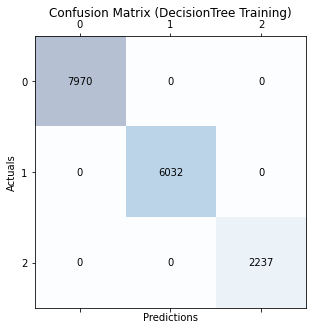

In [402]:
plot_confusion_matrix("(DecisionTree Training)", y_train, y_pred_train_dstree)

Testing Data Report

In [403]:
y_pred_test_dstree = dstree.predict(X_test)
displayMetrics("(DecisionTree Testing)", y_test, y_pred_test_dstree)

Accuracy (DecisionTree Testing) :  1.0
Precision Score (DecisionTree Testing) :  [1. 1. 1.]
Recall (DecisionTree Testing) :  [1. 1. 1.]
F1 Score (DecisionTree Testing) :  [1. 1. 1.]


In [404]:
print(classification_report(y_test, y_pred_test_dstree, target_names=target_names))

              precision    recall  f1-score   support

    Low Risk       1.00      1.00      1.00      1879
 Medium Risk       1.00      1.00      1.00      1586
   High Risk       1.00      1.00      1.00       595

    accuracy                           1.00      4060
   macro avg       1.00      1.00      1.00      4060
weighted avg       1.00      1.00      1.00      4060



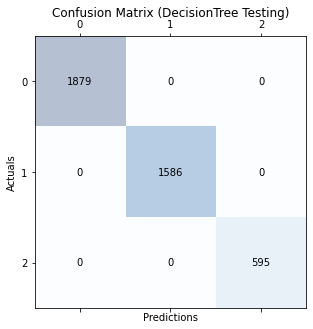

In [405]:
plot_confusion_matrix("(DecisionTree Testing)", y_test, y_pred_test_dstree)